In [111]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
from utils import *

import ffn
%pylab inline

import seaborn as sns
sns.set(style="whitegrid")

%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\jango\Anaconda3\envs\research\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plot', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [112]:
sundays = []
for d in allsundays(2015):
    sundays.append(d)
for d in allsundays(2016):
    sundays.append(d)
for d in allsundays(2017):
    sundays.append(d)
for d in allsundays(2018):
    sundays.append(d)
    
daily_ts = []
for d in everyday(2015):
    daily_ts.append(d)
for d in everyday(2016):
    daily_ts.append(d)
for d in everyday(2017):
    daily_ts.append(d)
for d in everyday(2018):
    daily_ts.append(d)

In [3]:
daily15 = pd.read_csv('daily_mktcap_2015.csv',index_col='Date', parse_dates=True)
daily16 = pd.read_csv('daily_mktcap_2016.csv',index_col='Date', parse_dates=True)
daily17 = pd.read_csv('daily_mktcap_2017.csv',index_col='Date', parse_dates=True)
daily18 = pd.read_csv('daily_mktcap_2018.csv',index_col='Date', parse_dates=True)
daily15.MktCap = daily15.MktCap.str.replace('?','')
daily16.MktCap = daily16.MktCap.str.replace('?','')
daily17.MktCap = daily17.MktCap.str.replace('?','')
daily18.MktCap = daily18.MktCap.str.replace('?','')

C:\Users\jango\Anaconda3\envs\research\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
daily = daily15.append(daily16, sort=False)
daily = daily.append(daily17, sort=False)
daily = daily.append(daily18, sort=False)

In [223]:
df_multi = daily[:]
df_multi.reset_index(inplace=True)
df_multi = df_multi[df_multi.MktCap != '']
df_multi = df_multi[df_multi.MktCap != ' ']
#df_multi.drop(df_multi[df_multi.MktCap.astype(float) < 500000].index, inplace=True)
df_multi = df_multi.dropna()

In [224]:
df_multi.set_index(['Symbol', 'Date'], inplace=True)

In [225]:
weighted_df = weight_df_normal(daily, df_multi, sundays, daily_ts)

In [226]:
master_df = {}

for pct in range(5, 25, 5):
    s = sum(weighted_df.sort_values(by=[sundays[0]], ascending=False).dropna(subset=[sundays[0]]).iloc[:,0][0:pct])
    i_divisor = s / 100
    values = []
    dates = []
    for n in range(len(sundays)):
        value = sum(weighted_df.sort_values(by=[sundays[n]], ascending=False).dropna(subset=[sundays[n]]).iloc[:,n][0:pct]) / i_divisor
        values.append(value)
        dates.append(sundays[n])
    master_df[pct] = values

In [227]:
df = pd.DataFrame(master_df, dates)

In [228]:
df_log = np.log10(df)
df_norm = df.apply(lambda x: x / x[0])

[Text(0, 0.5, 'Price of Index'), Text(0.5, 0, 'Year')]

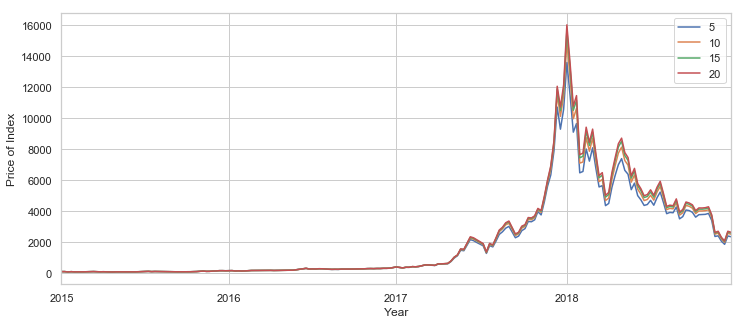

In [229]:
plot_df_norm = df.plot(legend=True,figsize=(12,5))
plot_df_norm.set(xlabel='Year', ylabel='Price of Index')

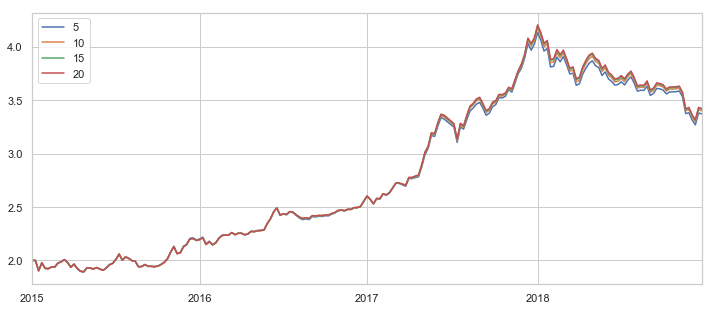

In [230]:
df_log.plot.line(legend=True,figsize=(12,5))

In [231]:
stats = df.calc_stats()
stats.display()

Stat                 5           10          15          20
-------------------  ----------  ----------  ----------  ----------
Start                2015-01-04  2015-01-04  2015-01-04  2015-01-04
End                  2018-12-30  2018-12-30  2018-12-30  2018-12-30
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         2249.33%    2410.84%    2492.18%    2538.02%
Daily Sharpe         3.02        3.05        3.06        3.07
Daily Sortino        5.76        5.87        5.93        5.95
CAGR                 120.76%     124.47%     126.27%     127.27%
Max Drawdown         -86.32%     -86.71%     -86.97%     -87.04%
Calmar Ratio         1.40        1.44        1.45        1.46

MTD                  -0.74%      -0.41%      0.23%       0.50%
3m                   -41.81%     -41.82%     -41.65%     -41.71%
6m                   -46.22%     -46.37%     -46.85%     -47.16%
YTD                  -77.79%     -78.07%     -78.19%     -78.30%
1Y                   -74.71%   

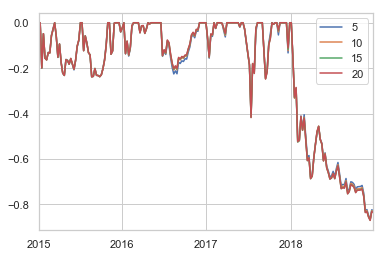

In [232]:
ax = df.to_drawdown_series().plot()

In [233]:
daily = daily[daily.MktCap != '']
daily = daily[daily.MktCap != ' ']

In [234]:
mktcap_comp = {}

total_mktcap = sum(daily.loc[sundays[-1]].MktCap.astype(float))

for pct in range(5, 45, 5):
    mktcap_comp[pct] = round(100 / total_mktcap * sum(weighted_df.sort_values(by=[sundays[-1]], ascending=False).dropna(subset=[sundays[-1]]).iloc[:,-1][0:pct]),2)
    
mktcap_comp['alle'] = 100
mktcap_comp = pd.DataFrame.from_dict(mktcap_comp, orient='index')
mktcap_comp = mktcap_comp.reset_index()
mktcap_comp.columns = ['Anzahl Währungen im Index', 'Prozent am ganzen Markt']

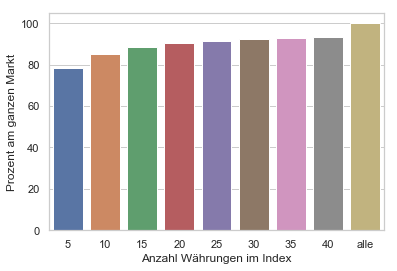

In [235]:
mktcap_comp_plot = sns.barplot(data=mktcap_comp, y='Prozent am ganzen Markt', x='Anzahl Währungen im Index')

In [236]:
weighted_df.sort_values(by=[sundays[-1]], ascending=False).dropna(subset=[sundays[-1]]).iloc[:,-1][0:5]

BTC    6.747551e+10
XRP    1.507674e+10
ETH    1.456007e+10
BCH    2.869903e+09
EOS    2.430235e+09
Name: 2018-12-30 00:00:00, dtype: float64

In [237]:
btc = pd.DataFrame(df_multi.loc['BTC'].Price.astype('float'))
xrp = pd.DataFrame(df_multi.loc['XRP'].Price.astype('float'))
eth = pd.DataFrame(df_multi.loc['ETH'].Price.astype('float'))
bch = pd.DataFrame(df_multi.loc['BCH'].Price.astype('float'))
eos = pd.DataFrame(df_multi.loc['EOS'].Price.astype('float'))

In [238]:
result = pd.concat([df[5], btc, xrp, eth, bch, eos], axis=1, sort=False)
result.columns= ['Kryptoindex', 'BTC', 'XRP', 'ETH', 'BCH', 'EOS']
result = result.ffill(axis = 0)

[Text(0, 0.5, 'Prices'), Text(0.5, 0, 'Date')]

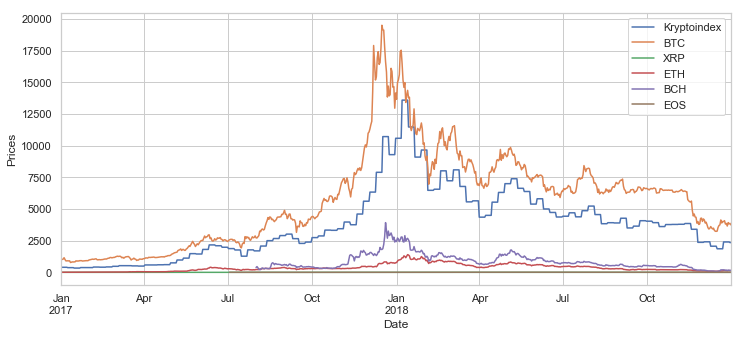

In [239]:
plot_comparison = result['2017':].plot(legend=True,figsize=(12,5))
plot_comparison.set(xlabel='Date', ylabel='Prices')

In [217]:
plot_comparison.figure.savefig("plot_comparison.png")

In [240]:
stats = result.calc_stats()
stats.display()

Stat                 Kryptoindex    BTC         XRP         ETH         BCH         EOS
-------------------  -------------  ----------  ----------  ----------  ----------  ----------
Start                2017-08-01     2017-08-01  2017-08-01  2017-08-01  2017-08-01  2017-08-01
End                  2018-12-31     2018-12-31  2018-12-31  2018-12-31  2018-12-31  2018-12-31
Risk-free rate       0.00%          0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         38.65%         37.69%      99.21%      -41.19%     -60.25%     44.38%
Daily Sharpe         0.61           0.58        0.84        0.17        0.43        0.79
Daily Sortino        0.97           0.99        1.94        0.28        0.87        1.58
CAGR                 25.97%         25.35%      62.73%      -31.27%     -47.89%     29.63%
Max Drawdown         -86.32%        -83.40%     -92.20%     -93.96%     -98.03%     -91.92%
Calmar Ratio         0.30           0.30        0.68        -0.33       -0.49       

In [251]:
data = {'Total Return': ['38.65', '37.69', '99.21', '-41.19', '-60.25', '44.38'], 
       'Max DD': ['-86.32', '-83.40', '-92.20', '93.96', '-98.03', '-91.92']}

In [255]:
risk_reward = pd.DataFrame(data)
risk_reward = risk_reward.set_index([pd.Index(['Top-5 Index', 'BTC', 'XRP', 'ETH', 'BCH', 'EOS'])])

In [259]:
risk_reward

,Total Return,Max DD
Top-5 Index,38.65,-86.32
BTC,37.69,-83.40
XRP,99.21,-92.20
ETH,-41.19,93.96
BCH,-60.25,-98.03
EOS,44.38,-91.92


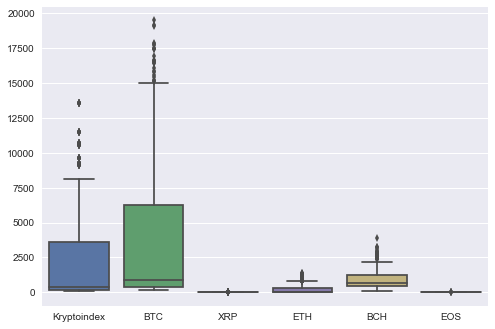

In [266]:
sns.boxplot(data=result)

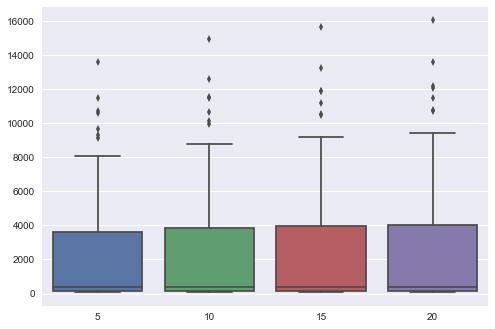

In [267]:
sns.boxplot(data=df)